In [2]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import interpolate

In [3]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wtk-us.h5", 'r')

In [20]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [23]:
dset = f['windspeed_60m']

In [ ]:
dset.id.id  # if this is an int, then you are using h5py!

In [51]:
dset.shape

(61368, 1602, 2976)

In [ ]:
dset.dtype

In [ ]:
dset.chunks

In [ ]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 155 GB!

In [ ]:
(dset.shape[0] * dset.shape[1] * dset.shape[2]) // (dset.chunks[0] * dset.chunks[1] * dset.chunks[2])  # lots a chunks

In [ ]:
dset.shape[1] * dset.shape[2] * 4  # 18 MB per slice

In [5]:
%time data = dset[1797,::8,::8]

Wall time: 2.37 s


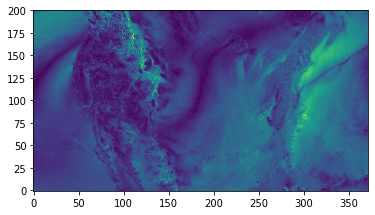

In [6]:
plt.imshow(data, origin="lower")

In [38]:
%time next_data = dset[1799,::8,::8]

Wall time: 1.08 s


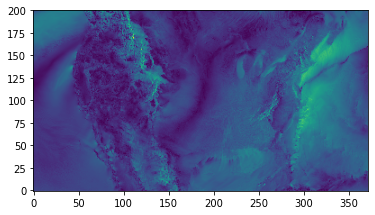

In [39]:
plt.imshow(next_data, origin="lower")

In [6]:
%time data = dset[2199,1100:1400,2000:2400]  # full-rez subset

Wall time: 1.96 s


In [21]:
coords = f['coordinates']

In [24]:
coord_data = coords[1601]

In [26]:
len(coord_data)

2976

In [49]:
lat = [x[0] for x in coord_data]
print(max(lat))
print(min(lat))

53.342793
45.97596


In [50]:
lon = [x[1] for x in coord_data]
print(max(lon))
print(min(lon))

-54.261658
-137.738342


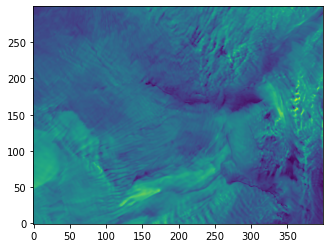

In [8]:
plt.imshow(data, origin="lower")

In [16]:
%time tseries = dset[:, 801, 600]

Wall time: 12.6 s


In [ ]:
tseries.shape

In [26]:
day_tseries = dset[::24, 800, 600]

OSError: Error retrieving data: 429

In [17]:
tseries[0:10]

array([ 2.8840027,  1.0162659,  2.5177765,  4.861595 ,  6.0060425,
        5.648979 ,  6.1800003,  8.539078 ,  9.756767 , 11.96936  ],
      dtype=float32)

In [10]:
len(tseries)   # 365 days * 24 hours * 7 years

61368

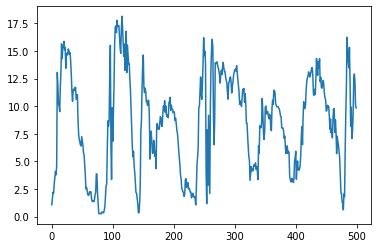

In [17]:
x = range(dset.shape[0])
plt.plot(x[0:500], tseries[0:500])

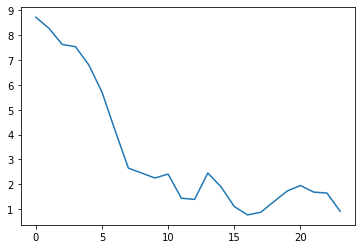

In [30]:
tseries = dset[:, 100, 1000]
x = range(dset.shape[0])
plt.plot(x[0:24], tseries[0:24])

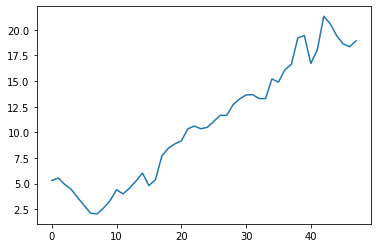

In [33]:
tseries = dset[:, 400, 600]
x = range(dset.shape[0])
plt.plot(x[0:48], tseries[0:48])

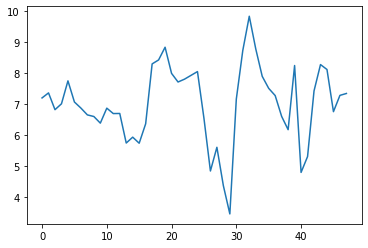

In [35]:
tseries = dset[:, 300, 600]
x = range(dset.shape[0])
plt.plot(x[0:48], tseries[0:48])

c:\users\rupak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


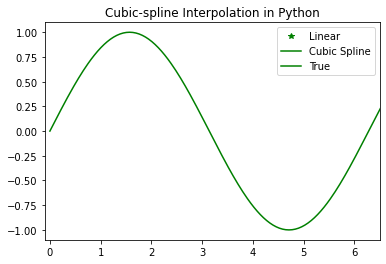

In [10]:
t = x[0:50]
y = tseries[0:50]
temp = interpolate.splrep(t, y, s=0)
tnew = np.arange(0, np.pi**2, np.pi/100)
ynew = interpolate.splev(tnew, temp, der=0)

c:\users\rupak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  after removing the cwd from sys.path.


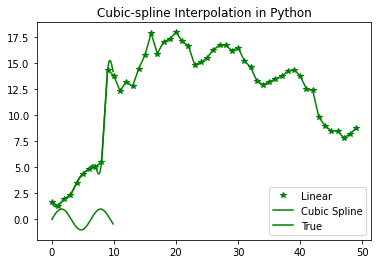

In [11]:
plt.figure()
  
plt.plot(t, y, '*', tnew, ynew, tnew, np.sin(tnew),
         t, y, 'b', color="green")
  
plt.legend(['Linear', 'Cubic Spline', 'True'])
# plt.axis([-0.1, 6.5, -1.1, 1.1])
plt.title('Cubic-spline Interpolation in Python')
plt.show()

In [58]:
import dask.array as da
chunks=(1, 400,600)
x = da.from_array(dset, chunks=chunks)

In [14]:
from random import randint
ntimes=dset.shape[0]
tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

Wall time: 16.8 ms


Wall time: 3.29 s


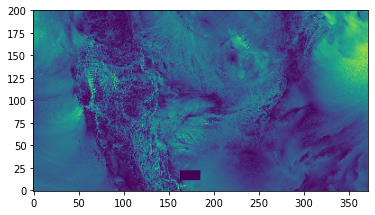

In [15]:
%time plt.imshow(data, origin="lower")

In [ ]:
dni

In [19]:
nsrdb = h5pyd.File("/nrel/nsrdb/v3/nsrdb_2012.h5", 'r')

In [20]:
dset2 = nsrdb['dni']

In [22]:
dset2.shape

(17568, 2018392)

In [21]:
data2 = dset2[1797,::8,::8]

TypeError: Argument sequence too long